# Simple Diet Model


เด็กผู้หญิงคนหนึ่งกินอาหารวันละ 2,500 กิโลแคลอรี ใช้พลังงานในการเผาผลาญทั่วไป 1,200 กิโลแคลอรี ใช้พลังงานในการออกกำลังกายวันละ 16 กิโลแคลอรีต่อน้ำหนักตัว 1 กิโลกรัม และอัตราส่วนในการเปลี่ยนแปลงน้ำหนักตัวเป็นพลังงาน คือ น้ำหนัก 1 กิโลกรัม ต่อพลังงาน 10,000 กิโลแคลอรี 

ถ้าในเช้าวันอาทิตย์เธอมีน้ำหนัก 55 กิโลกรัม จงสร้างแบบจำลองทางคณิตศาสตร์เพื่อพยากรณ์น้ำหนักของเธอ 



**(อ้างอิงจาก ตัวอย่าง 4.22)**

$$\begin{align} E_{n} & = 10000 W_{n} + 2500 - 1200 - 16 W_{n}, \\ 
W_{n+1} & = \frac{E_{n} }{10000}\\
& = \frac{1}{10000} (10000 W_{n} + 2500 - 1200 - 16 W_{n}) \\
& = 0.9984W_n + 0.13
\end{align}$$

โดยมีสูตรบีเนต์ในการหา $W_n$ คือ

$$ W_n = 0.9984^n W_0 + \frac{1-0.9984^n}{1-0.9984}(0.13) $$


In [32]:
weight_on_wed = 55
W_0 = weight_on_wed

print(f'Her initial weight at wednesday is {W_0} kg.')

Her initial weight at wednesday is 55 kg.


[0 1 2 3 4 5 6]
[55.26759723 55.30916907 55.3506744  55.39211332 55.43348594 55.47479237
 55.5160327 ]


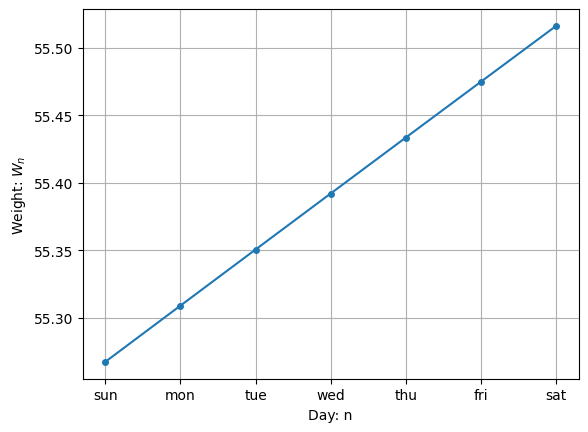

In [27]:
# Python with numpy
# Use the Binet Formula

import numpy as np
import matplotlib.pyplot as plt

days = 7
a = 0.9984
b = 0.13

n = np.arange(0, days)
W = (a**n)*W_0 + ((1 - a**n)/(1-a))*b

print(n)
print(W)

plt.plot(n, W, marker='o', markersize=4)
plt.grid()
plt.xlabel('Day: n');
plt.ylabel('Weight: $W_n$');

plt.xticks(n, ['sun', 'mon', 'tue', 'wed', 'thu', 'fri', 'sat']);

-------------

## 1

น้ำหนักของเธอในตอนเช้าของวันเสาร์ถัดไป


In [13]:
weight_on_sat = W[6]

print(f'Her weight on the next saturday is {weight_on_sat:.2f} kg.')

Her weight on the next saturday is 55.25 kg.


------------------

## 2

น้ำหนักของเธอในตอนเช้าของวันเสาร์ถัดไป ถ้าในวันพุธเธอกินอาหาร 3,500 กิโลแคลอรี

In [17]:
weight_on_wed = W[3]

weight_on_thu = (1/10000) * (10000*weight_on_wed + 3500 - 1200 - 16*weight_on_wed)

print(f'Her weight on the thursday is {weight_on_thu:.2f} kg.')

Her weight on the thursday is 55.27 kg.


[0 1 2]
[55.26759723 55.30916907 55.3506744 ]


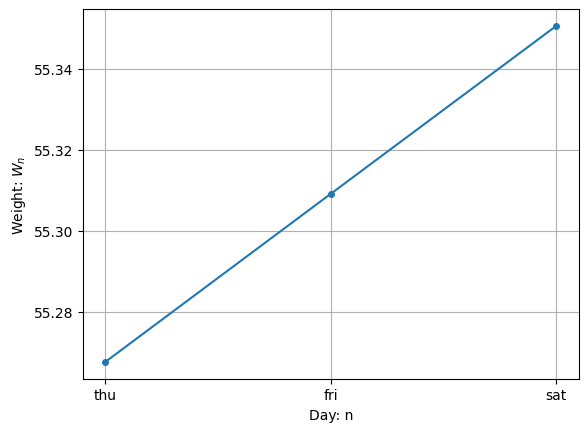

In [28]:
W_0 = weight_on_thu

days = 3
a = 0.9984
b = 0.13

n = np.arange(0, days)
W = (a**n)*W_0 + ((1 - a**n)/(1-a))*b

print(n)
print(W)

plt.plot(n, W, marker='o', markersize=4)
plt.grid()
plt.xlabel('Day: n');
plt.ylabel('Weight: $W_n$');

plt.xticks(n, ['thu', 'fri', 'sat']);

In [19]:
weight_on_sat = W[2]

print(f'Her weight on the next saturday is {weight_on_sat:.2f} kg.')

Her weight on the next saturday is 55.35 kg.


--------------------

## 3

ปริมาณอาหารที่เธอสามารถกินได้ในแต่ละวัน ถ้าเธอต้องการจะลดน้ำหนัก